100
(650000,)
2278
average hb per min 75.67647411811409


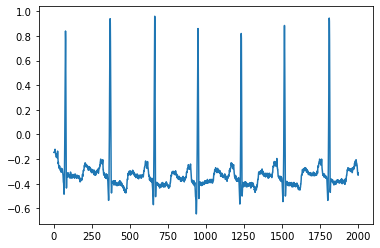

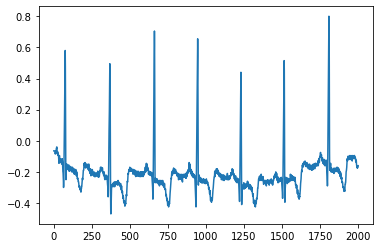

In [5]:
from wfdb import rdrecord, rdann
import numpy as np
import matplotlib.pyplot as plt

sample_freq = 360

def getHeartBeat(signal_data):
    m = signal_data.mean()
    std = signal_data.std()
    temp = (signal_data-m)/std
    binary = (temp > 2).astype(int)
    count = 0
    found_peak = False
    max_val = -1e10
    inds = []
    for i, val in enumerate(binary):
        if val > 0 and not found_peak:
            found_peak = True
            max_val = val
            inds.append(i)
        elif val == 0 and found_peak:
            found_peak = False
            count += 1
    print(count)
    d_inds = []
    for i, val in enumerate(inds[:-1]):
        d_inds.append(inds[i+1] - val)
    d_inds = np.array(d_inds)
    avg_distance = d_inds.mean()
    avg_hb = sample_freq * 60/avg_distance
    print("average hb per min", avg_hb)

nums = ['100','101','102','103','104','105','106','107','108','109','111','112','113','114','115','116','117','118',
        '119','121','122','123','124','200','201','202','203','205','207','208','209','210','212','213','214','215',
        '217','219','220','221','222','223','228','230','231','232','233','234']

for num in nums:
    if num != "100":
        continue
    record = rdrecord(num, smooth_frames= True, pn_dir='mitdb')
    test = record.p_signal
    signals0 = np.nan_to_num(record.p_signal[:,0])
    signals1 = np.nan_to_num(record.p_signal[:,1])
    print(num)
    print(signals0.shape)
    getHeartBeat(signals0)
    plt.plot(signals0[:2000])
    plt.show()
    plt.plot(signals1[:2000])
    plt.show()
    ann = rdann(num, extension='atr', pn_dir='mitdb')
    print("")